<a href="https://colab.research.google.com/github/coldsober-irene/ASSIGNMENTS/blob/main/file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from collections import Counter
from random import randint
from math import sqrt
import seaborn as sns
import pandas as pd
import numpy as np
import psutil

In [88]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [89]:
junk_datasets = pd.read_csv('/content/drive/MyDrive/machine vision/winesq.csv')
clean = junk_datasets.dropna()



#Memory usage

In [90]:
def memory_usage():
    process = psutil.Process()
    mem = process.memory_info().rss / (1024)  # Memory usage in MB
    return mem

#convert type into numerical data (1 and 0)

In [91]:
for i in range(len(clean)):
    if clean.iloc[i, 0] == 'white':
        clean.iloc[i,0] = 1
    else:
        clean.iloc[i,0] = 0


#mix data

In [92]:
mixed = []
indices = []
while len(mixed) != len(clean):
    integer = randint(0, len(clean)-1)

    if integer not in indices:
        try:
            mixed.append(list(clean.iloc[integer][:]))
            indices.append(integer)
        except IndexError:
            pass

In [93]:
mixed_df = pd.DataFrame(mixed, columns = list(clean.columns))
# mixed

In [94]:
features = np.array(mixed)[:, 1:]
labels = np.array(mixed)[:, 0]

In [95]:
def euclidean_dist(x1, x2):
  distance = np.sqrt(np.sum((x1 - x2)**2))
  return distance

In [96]:
class KNN:
  def __init__(self, k = 5) -> None:
    self.k = k

  def fit(self, x, y):
    self.x_train = x
    self.y_train = y
    print(len(x_train), len(y_train))

  def predict(self, X):
    predictions = [self._prediction(x) for x in X]
    return predictions

  def _prediction(self, x):
    distances = [euclidean_dist(x, x_train) for x_train in self.x_train]

    # closest k
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common_label = Counter(k_nearest_labels).most_common()
    return most_common_label[0][0]


In [97]:
class pca:
    def __init__(self, df_array) -> None:
        self.df_arr = df_array
        self.standardized_df = []
        self.cols = [str(i) for i in range(len(df_array[0]))]
        # STANDARDIZE DATASET SUCH THAT MEAN WILL BE 0 AND STANDARD DEVIATION BE 1
        self.std_data = self.standadardize_data()
        self.cov_matrix = self.compute_covariance_matrix(self.std_data)

    def pca_chosen(self, components = 3):
        return self.Compute_principal_components(cov_matrix=self.cov_matrix, components = components)

    def standadardize_data(self):
        data_with_mean_0 = self.df_arr - self.df_arr.mean()
        data_with_std_1 = data_with_mean_0 / self.df_arr.std()
        standardized_data = data_with_std_1
        self.standardized_df = pd.DataFrame(standardized_data, columns = self.cols)

        # mean of each feature
        each_feature_mean = self.standardized_df.mean()
        for index, col in enumerate(self.cols):
            self.standardized_df[col] -= each_feature_mean[index]
        return self.standardized_df

    def compute_covariance_matrix(self, standardized_data):
        multiplied = pd.DataFrame()
        for col in self.cols:
            for j, COL in enumerate(self.cols):
                if j != len(self.cols):
                    multiplied[col + " " + self.cols[j]] = standardized_data[col] * standardized_data[self.cols[j]]

        sums = multiplied.sum()
        c = [i for i in range(0, len(sums), len(self.cols))]

        Covariance_matrix = []
        for i, index in enumerate(c):
            try:
                Covariance_matrix.append(list(sums[index:c[i+1]]))
            except IndexError:
                Covariance_matrix.append(list(sums[index:]))

        covariance_df = pd.DataFrame(Covariance_matrix, columns=self.cols, index = self.cols)
        cov_matrix = np.array(Covariance_matrix)
        return cov_matrix

    def Compute_principal_components(self, cov_matrix, components = 3):
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        eigenvalues_eugenvectors = {eigenvalue:eigenvectors[index] for index, eigenvalue in enumerate(eigenvalues)}
        eigenvalues.sort()

        # CHOOSE ONLY TOP 3 MAXIMUM EIGENVALUES AND GET THEIR EIGENVECTORS
        max_3_eigenvectors = eigenvalues[::-1][:components]
        eigenvectors_of_top_3_eigenvalues = np.array([eigenvalues_eugenvectors[eigen] for eigen in max_3_eigenvectors])

        eigenvectors_of_top_3_eigenvalues = np.transpose(eigenvectors_of_top_3_eigenvalues)
        reduced_dimension_wine_dataset = np.dot(self.df_arr, eigenvectors_of_top_3_eigenvalues)
        pc_df = pd.DataFrame(reduced_dimension_wine_dataset,
                            columns = ['Principal comp1', 'Principal comp2', 'Principal comp3'])
        # p = pc_df
        # dfi.export(pc_df.head(15).style.set_table_styles(), "pca.png", table_conversion="matplotlib")
        return reduced_dimension_wine_dataset, pd.DataFrame(reduced_dimension_wine_dataset,
                                                            columns = ['Principal comp1', 'Principal comp2', 'Principal comp3'])


In [ ]:
pc = pca(df_array=features)
all_pca, df = pc.pca_chosen()
all_pca = np.array(all_pca)


# without pca

In [99]:
x_train = features[:int(len(features) * .8)]
x_test = features[int(len(features) * .8):]
y_train = labels[:int(len(labels) * .8)]
y_test = labels[:int(len(labels) * .8)]

In [100]:
no_pca_memory1 = memory_usage()
classifier = KNN(k = 47)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_train)
print("Prediction: ",predictions)
print(f"y_text: {y_test}")
acc = np.sum(predictions == y_test) / len(y_test)
print(f"Accuracy: {acc}")
no_pca_memory2 = memory_usage()
print(f"WITHOUT PCA MEMORY USAGE: {no_pca_memory2 - no_pca_memory1} KB")

5170 5170
Prediction:  [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1

#with pca

In [101]:
pca_x_train = features[:int(len(all_pca) * .8)]
pca_x_test = features[int(len(all_pca) * .8):]
pca_y_train = labels[:int(len(labels) * .8)]
pca_y_test = labels[:int(len(labels) * .8)]

In [102]:
withPca_memory1 = memory_usage()
pca_classifier = KNN(k = 47)
pca_classifier.fit(pca_x_train, pca_y_train)
pca_predictions = pca_classifier.predict(pca_x_train)
print("Prediction: ",pca_predictions)
print(f"y_text: {y_test}")
pca_acc = np.sum(pca_predictions == y_test) / len(y_test)
print(f"Accuracy: {pca_acc}")
withPca_memory2 = memory_usage()
print(f"WITH PCA MEMORY USAGE: {withPca_memory2 - withPca_memory1} KB")

5170 5170
Prediction:  [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1

In [150]:
def plotting(data):
  # Create a DataFrame for easier plotting with Seaborn
  df = pd.DataFrame(data, columns=[str(i) for i in range(len(data[0]))])

  # Create a pair plot
  sns.set(style="ticks")
  sns.pairplot(df, markers='o', diag_kind='kde')

  # Show the plot
  plt.show()

def other_plot(data, labels, xtheta = 90, ytheta = 45, title = 'Correlation Heatmap'):
  # Convert the data to a DataFrame
  df = pd.DataFrame(data)

  # Calculate the correlation matrix
  correlation_matrix = df.corr()

  # Create a correlation heatmap
  plt.figure(figsize=(8, 6))
  ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 9}) #, yticklabels=['09','06','02']
  ax.set_xticklabels(labels, rotation=xtheta)
  ax.set_yticklabels(labels, rotation=ytheta)
  plt.title(title)

  plt.show()

#plot data before pca

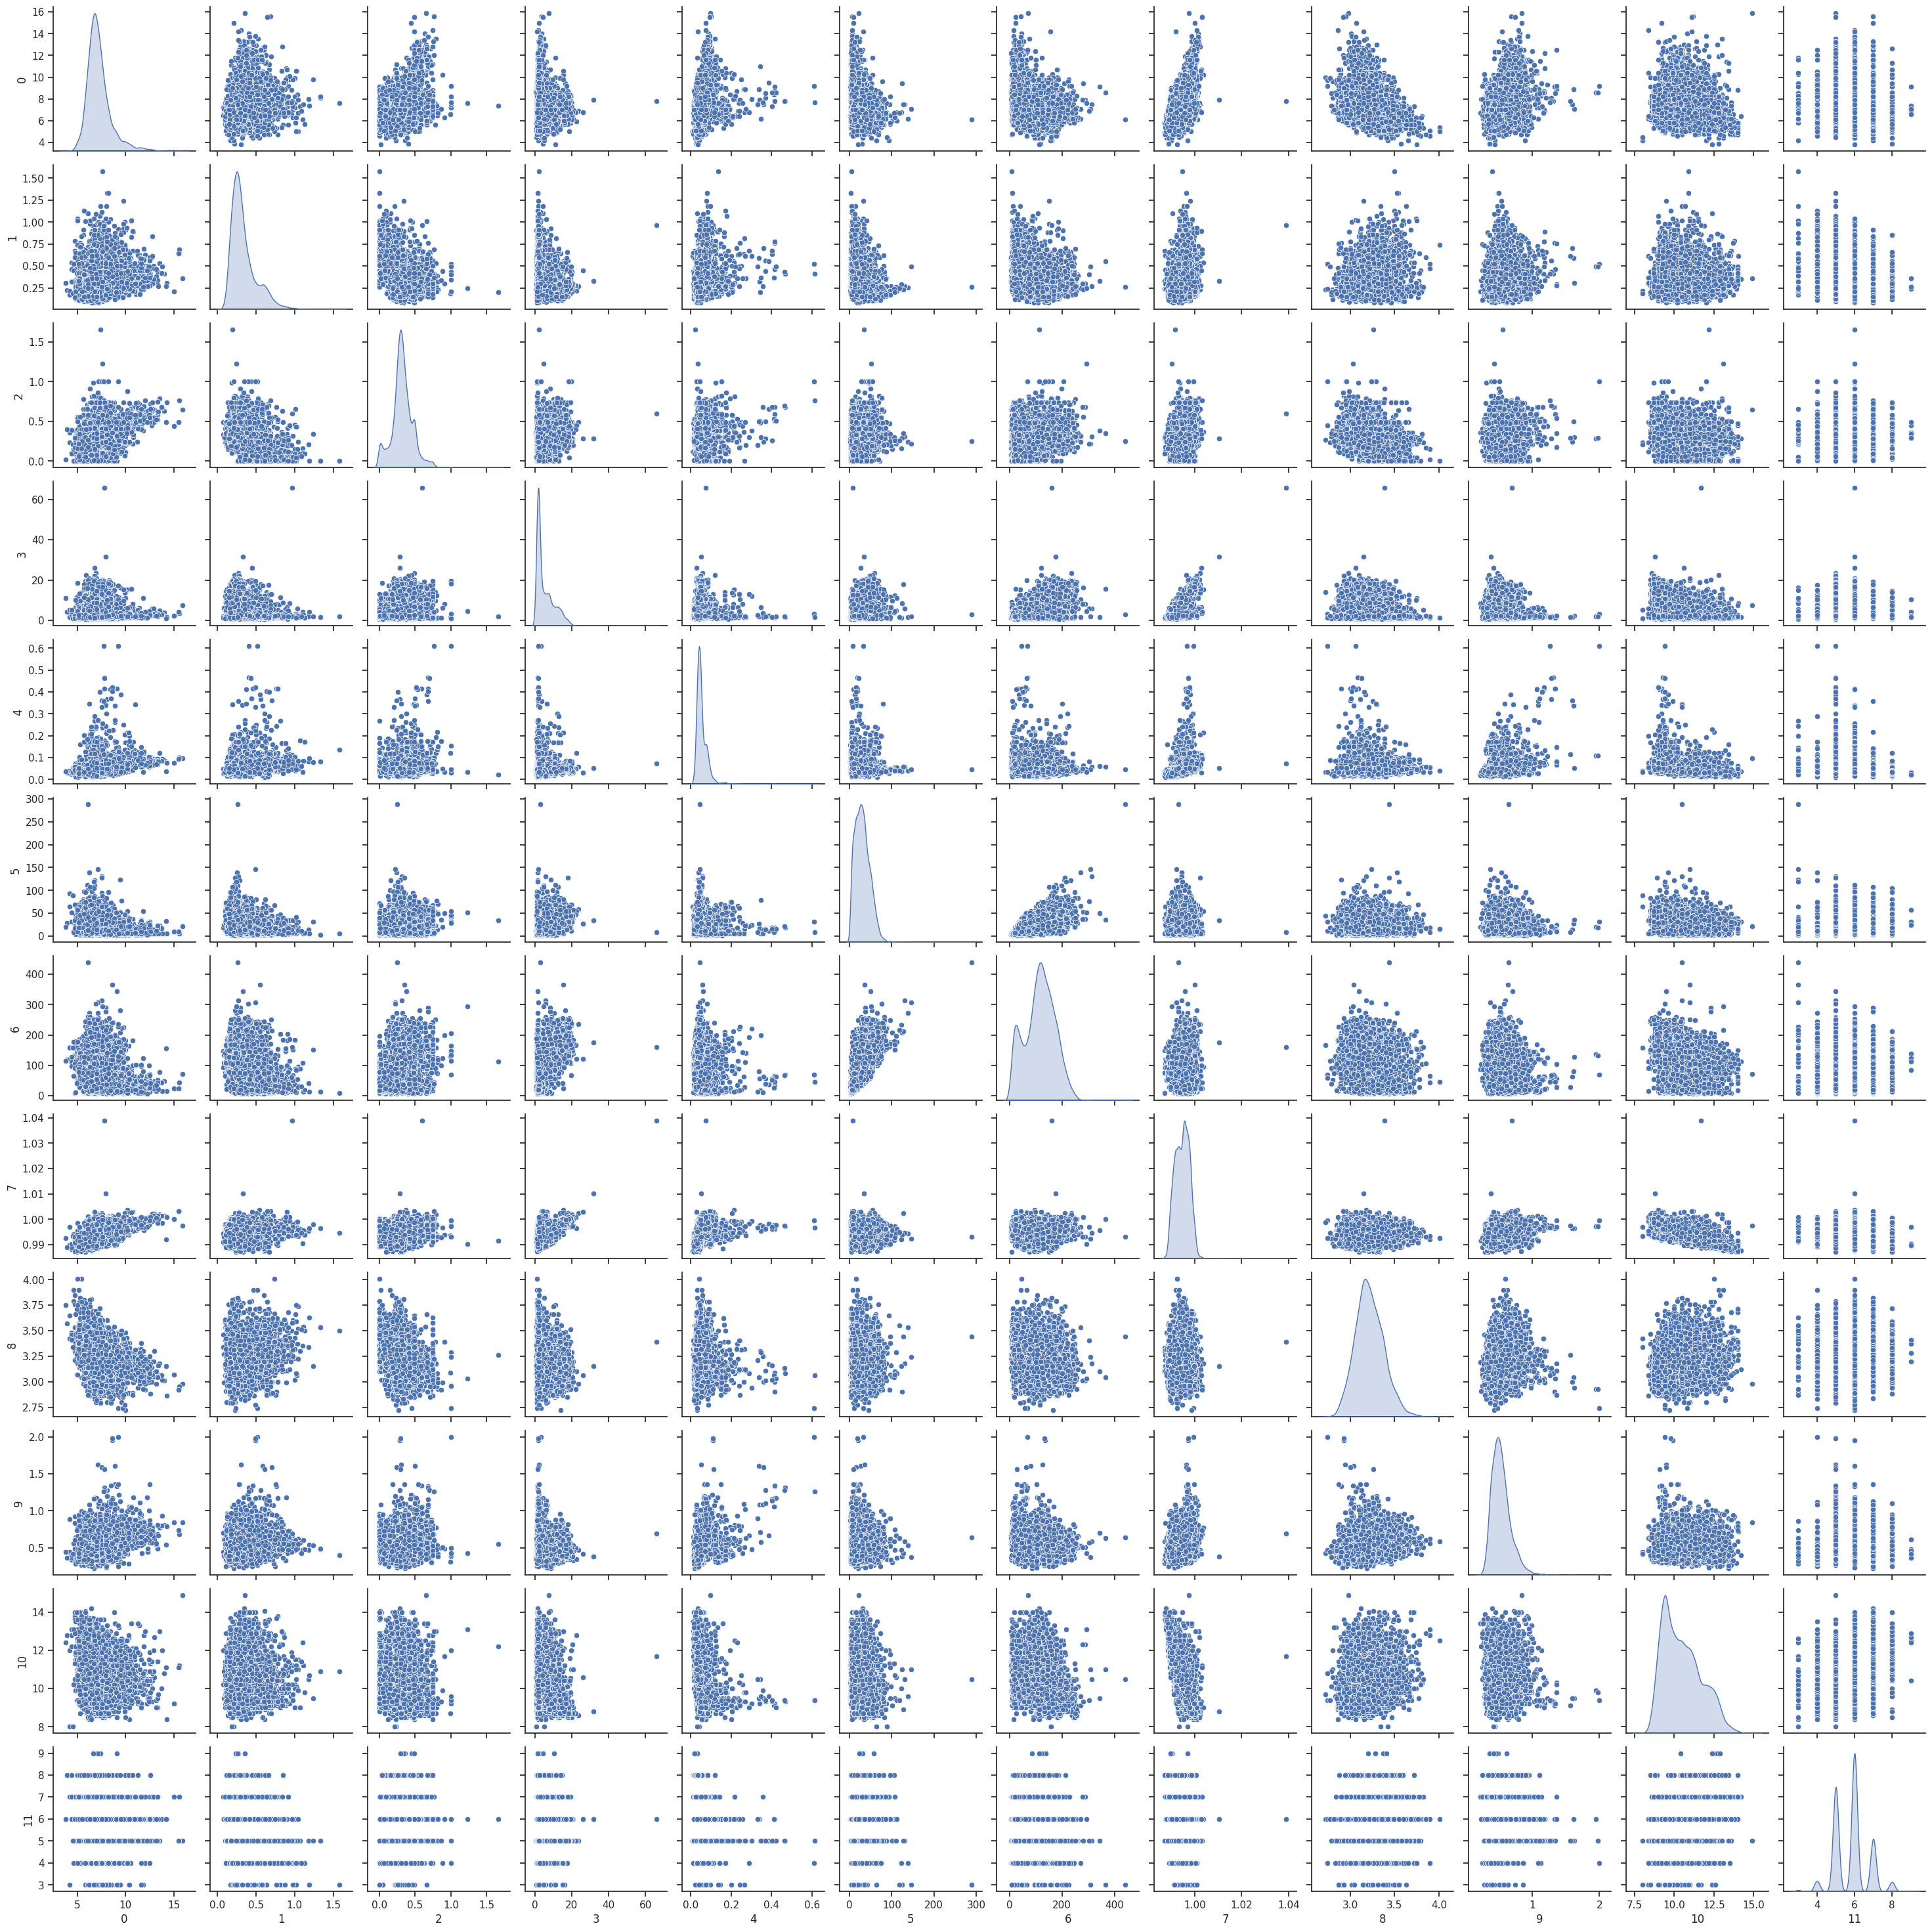

In [104]:
plotting(data = features)

#plot pca data

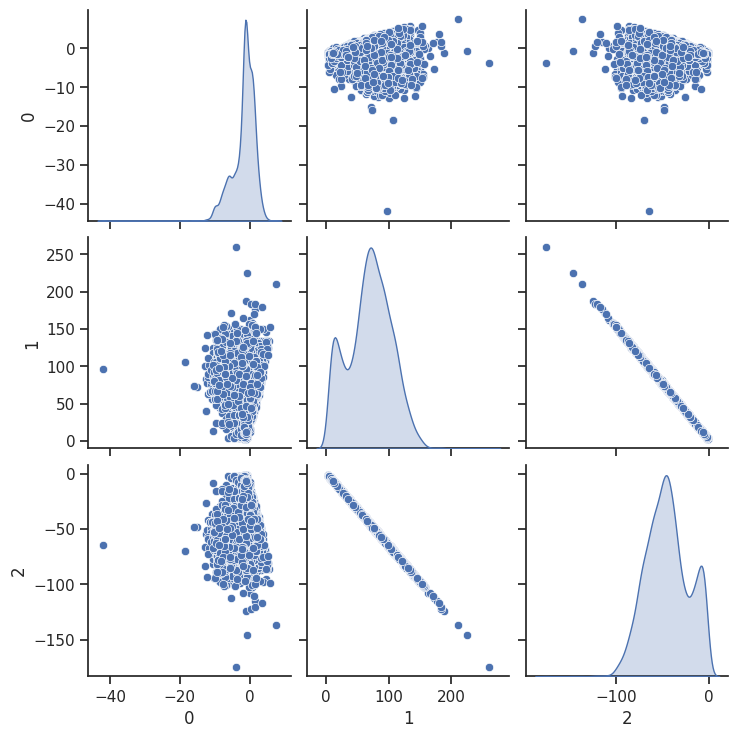

In [105]:
plotting(all_pca)

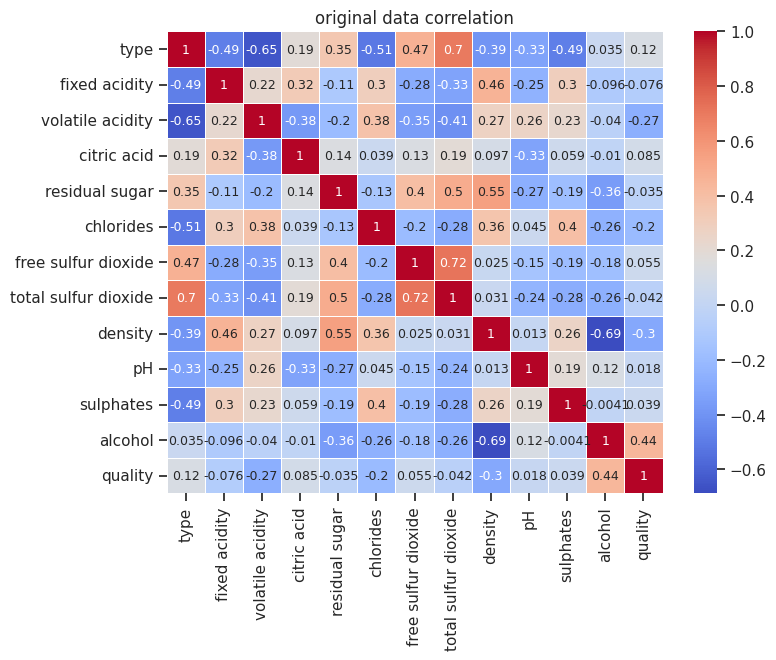

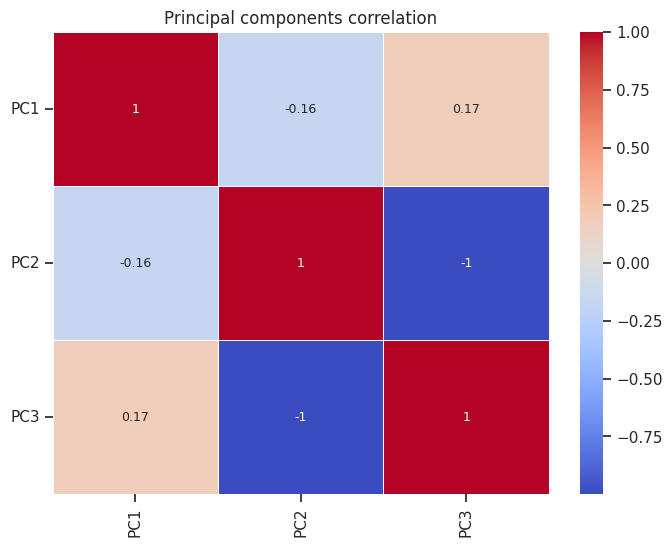

In [152]:
# other_plot(data = features, labels = list(clean.columns)[1:], ytheta = 0, title = "original data correlation")
other_plot(data = mixed, labels = list(clean.columns), ytheta = 0, title = "original data correlation")
other_plot(data = all_pca, labels = ['PC1', 'PC2', 'PC3'], ytheta = 0, title = 'Principal components correlation')


In [ ]:
error_rate_pca = {}
for i in range(2, 11):

